In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [3]:
data = pd.read_excel('data.xlsx')

In [4]:
def interp_d(t):
    xvektor = np.array(data.iloc[:, 0])
    yvektor = np.array(data.iloc[:, 1])
 
    return np.interp(np.array(t), xvektor, yvektor)

In [5]:
def interp_k(t):
    xvektor = np.array(data.iloc[:, 0])
    yvektor = np.array(np.cumsum(data.iloc[:, 3]))

    return np.interp(np.array(t), xvektor, yvektor)

In [12]:
def cost_function(k, d):
    period = 365 - 1
    vektor = np.linspace(0, 365, 20000)
    kvektor = k * interp_k((vektor-d))
    dvektor = interp_d(vektor)

    cost = (np.trapz((kvektor - dvektor) ** 2, vektor))/(period-d)

    return cost

In [8]:
def plot_cost_function(vector, period, iterations, start, stop):
    gamm = 0.000000001
    h = 0.1
    c = 6000
    cNew = 7000
    k = 0.02
    d = 4.5
    iter=0
    
    while np.abs(cNew-c) > 1e-6:
        c = cNew
        cdx = (cost_function(k+h, d) - cost_function(k-h, d))/(2*h)
        cdy = (cost_function(k, d+h) - cost_function(k, d-h))/(2*h)
        k = k - gamm*cdx
        d = d - gamm*cdy
        cNew = cost_function(k, d)
        iter = iter + 1
    
    print('iterasjoner: ', iter)
    print(k, d)
    plt.plot(vector, np.array(k * interp_k(vector - d)))
    plt.plot(vector, interp_d(vector))
    plt.xlabel('Døgn')
    plt.legend(['k*K(t-d)', 'D(t)'])
    plt.title('k: '+ str(k) + '\nd: ' + str(d) + '\niterasjoner: ' + str(iter))
    plt.tight_layout()
    plt.show()
    print('ferdig')

iterasjoner:  35
0.02129027545978381 4.500000309596707


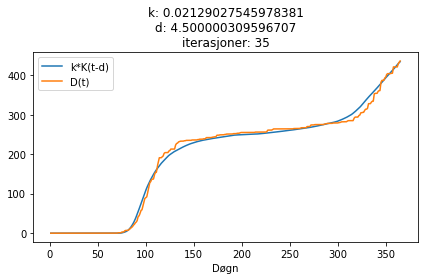

ferdig


In [14]:
if __name__ == '__main__':
    start = 1
    slutt = 365
    periode = slutt - start + 1
    iterasjoner = periode * 6
    plotvektor = np.array(np.linspace(start, slutt, iterasjoner))
    plot_cost_function(plotvektor, periode, iterasjoner, start, slutt)